### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns

In [2]:
df = pd.read_csv("../data/marketing_campaign.csv", sep=";")
CURRENT_YEAR = 2024
df["Age"] = CURRENT_YEAR - df["Year_Birth"]
df["PurchasesCount"] = df["MntWines"] +  df["MntFruits"] 
+ df["MntMeatProducts"] + df["MntFishProducts"] 
+ df["MntSweetProducts"] + df["MntGoldProds"]

0       176
1         7
2        63
3         8
4        42
       ... 
2235    365
2236      8
2237     36
2238     91
2239     22
Length: 2240, dtype: int64

In [3]:
complains_count = df["Complain"].sum()
complains_count

21

In [4]:
average_age = int(df["Age"].mean())
average_buyer_age = int(df[df["PurchasesCount"] > 0]["Age"].mean())
print(average_age, average_buyer_age)

55 55


Не отличается

### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

In [5]:
columns = [
    "Education", 
    "Marital_Status", 
    "Income", 
    "Kidhome", 
    "Teenhome", 
    "Recency", 
    "NumWebPurchases", 
    "NumStorePurchases", 
    "Age"]

Для начала глянем на общую картину. Посмотрим, какая основная аудитория у данного магазина, сколько заказов / покупок делают в среднем 

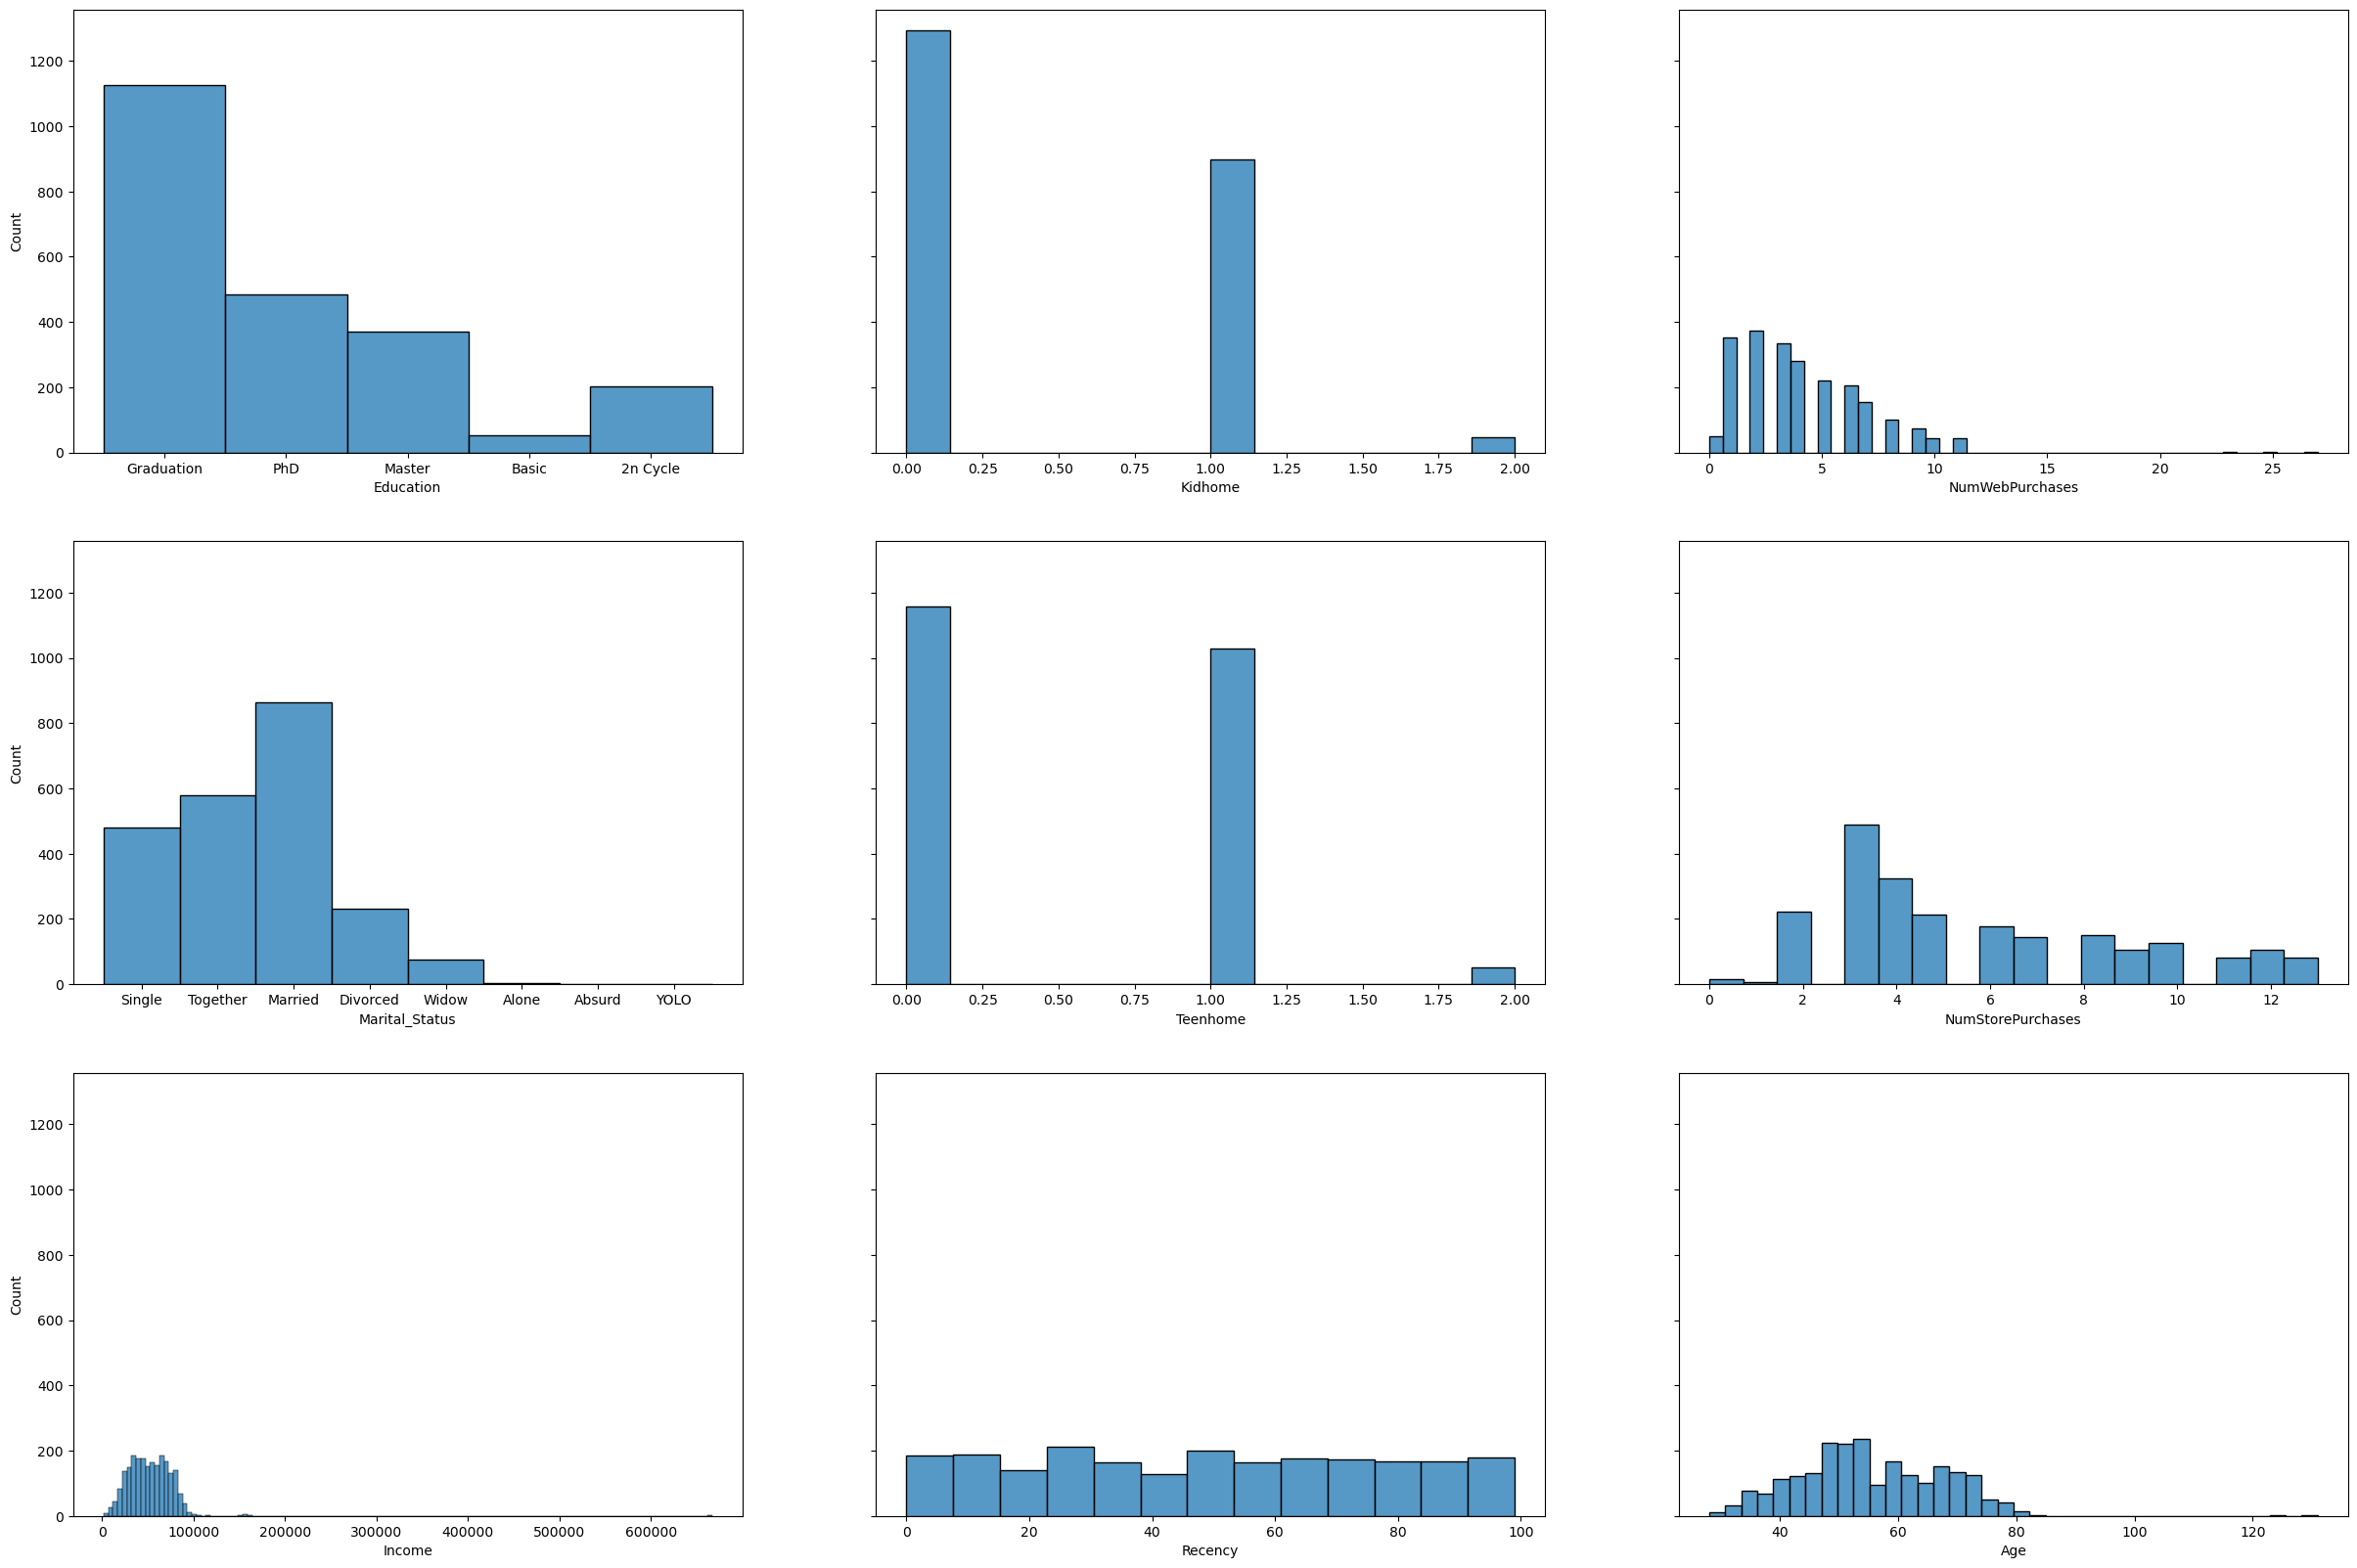

In [6]:
fig, axis = plt.subplots(3, 3, figsize=(30, 20), sharey=True)
for k, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axis[k%3, k//3])
plt.show()

Чаще всего отовариваются
1) Люди с высшим образованием (хотя тут скорее можно сделать вывод, что в этом конкретном районе мало людей без высшего образования, то есть район благополучный, учитывая доход, распределение семейного положения (мало вдов(цов) и разведенных) и средний возраст)
2) Люди, находящиеся в гражданском браке / сожительстве
3) Доход распределен +- нормально, основная клиентская база - люди со средним доходом
4) Аналогично про возраст 

Теперь отдельно рассмотрим, как связано образование, возраст, семейное положение и доход
с покупками в интернетах и в магазине

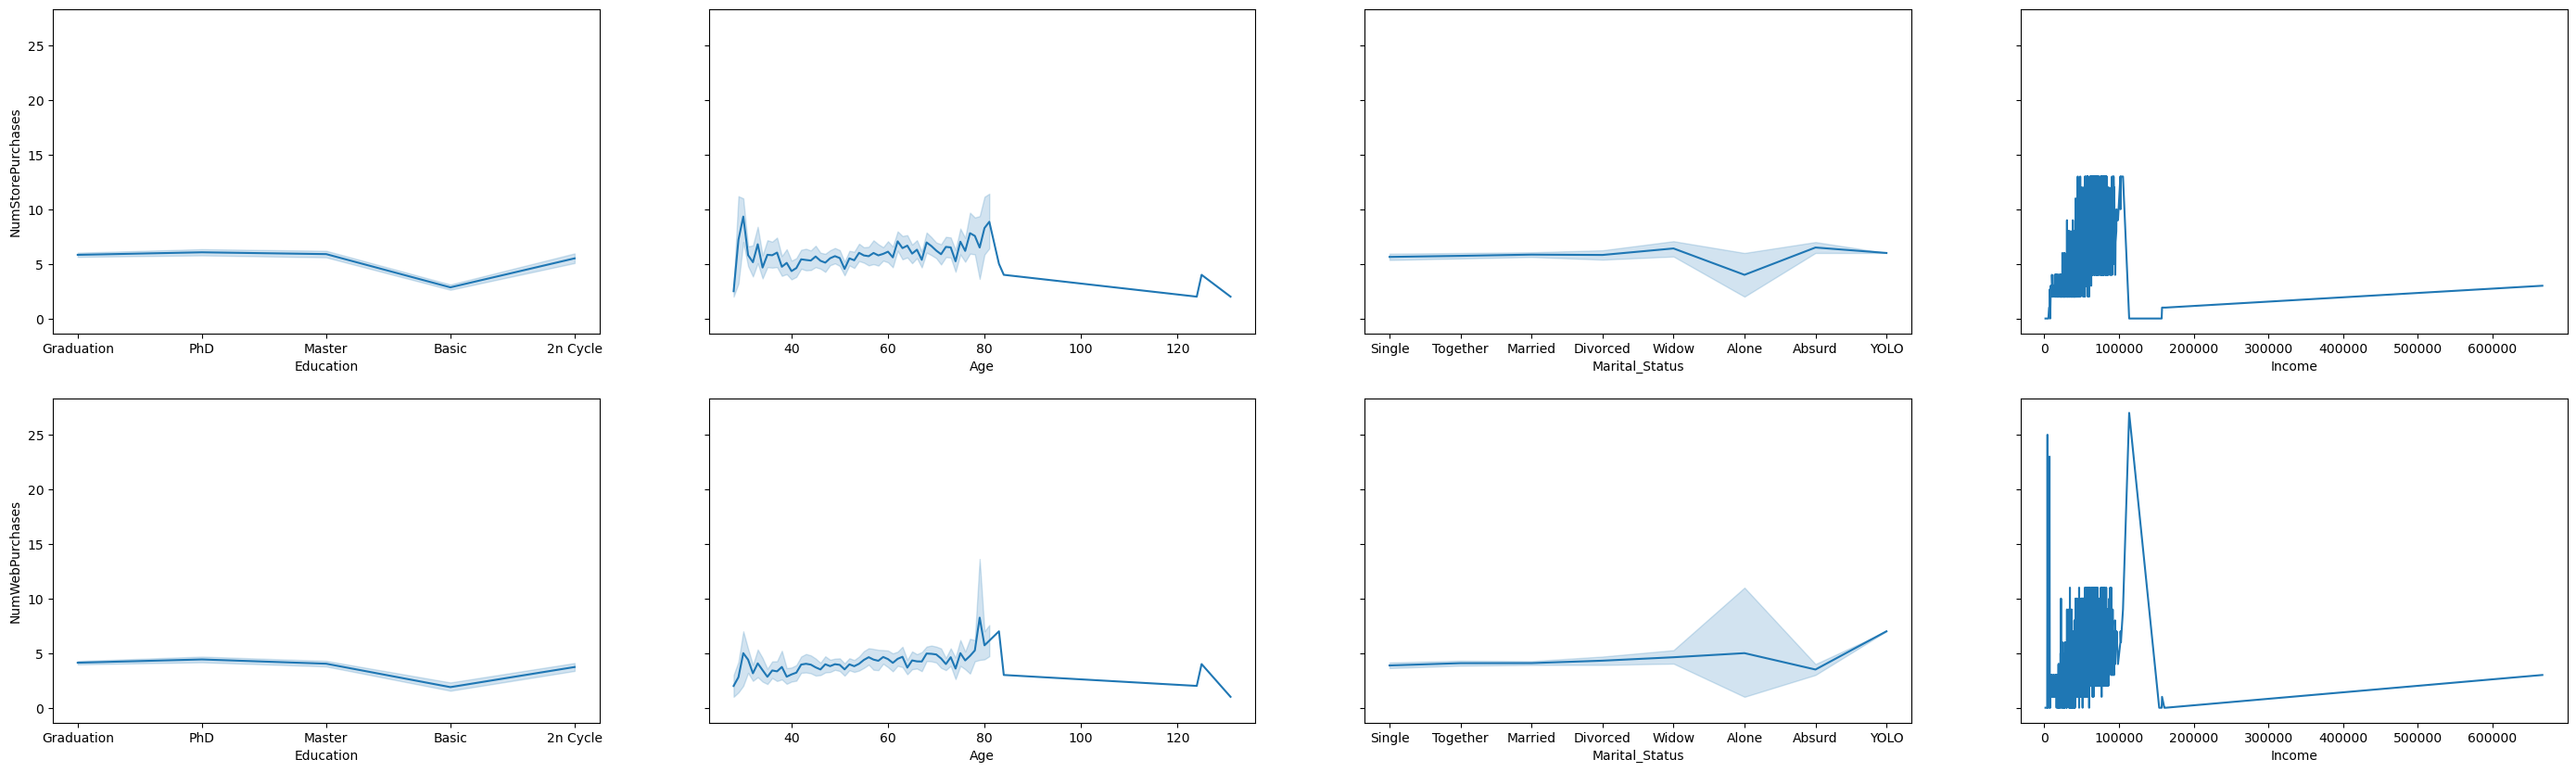

In [7]:
fig, axis = plt.subplots(2, 4, figsize=(35, 10), sharey=True)
sns.lineplot(data=df, x="Education", y="NumStorePurchases", ax=axis[0, 0])
sns.lineplot(data=df, x="Age", y="NumStorePurchases", ax=axis[0, 1])
sns.lineplot(data=df, x="Marital_Status", y="NumStorePurchases", ax=axis[0,2])
sns.lineplot(data=df, x="Income", y="NumStorePurchases", ax=axis[0,3])
sns.lineplot(data=df, x="Education", y="NumWebPurchases", ax=axis[1, 0])
sns.lineplot(data=df, x="Age", y="NumWebPurchases", ax=axis[1, 1])
sns.lineplot(data=df, x="Marital_Status", y="NumWebPurchases", ax=axis[1,2])
sns.lineplot(data=df, x="Income", y="NumWebPurchases", ax=axis[1,3])
plt.show()

Заметим, что
1) Люди без пары чаще закупаются через интернет
2) Люди со средним доходом чаще ходят в магазины очно
3) Люди либо с очень низким, либо с очень высоким доходом предпочитают закупаться через интернет

[]

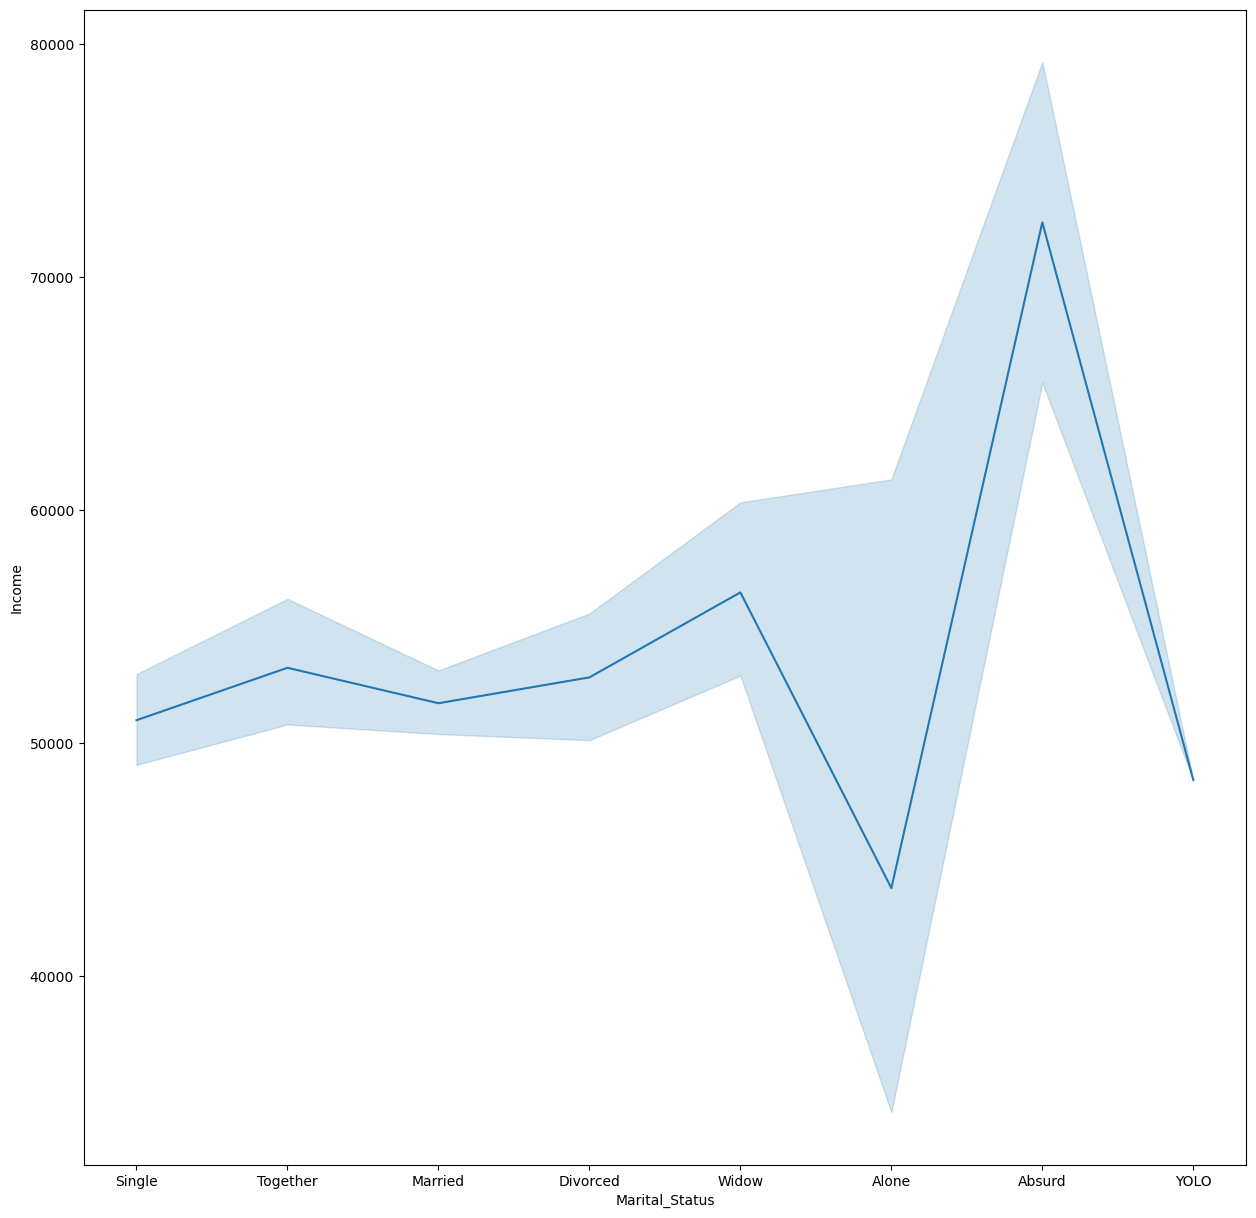

In [8]:
fig, axes = plt.subplots(figsize=(15, 15))
sns.lineplot(data=df, x="Marital_Status", y="Income")
plt.plot()

Это я проверял, правда ли, что у одиноких людей доход, как правило, ниже (подтвердилось)

Теперь рассмотрим, как все колонки связаны между собой

/home/timur/.conda/envs/my-env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


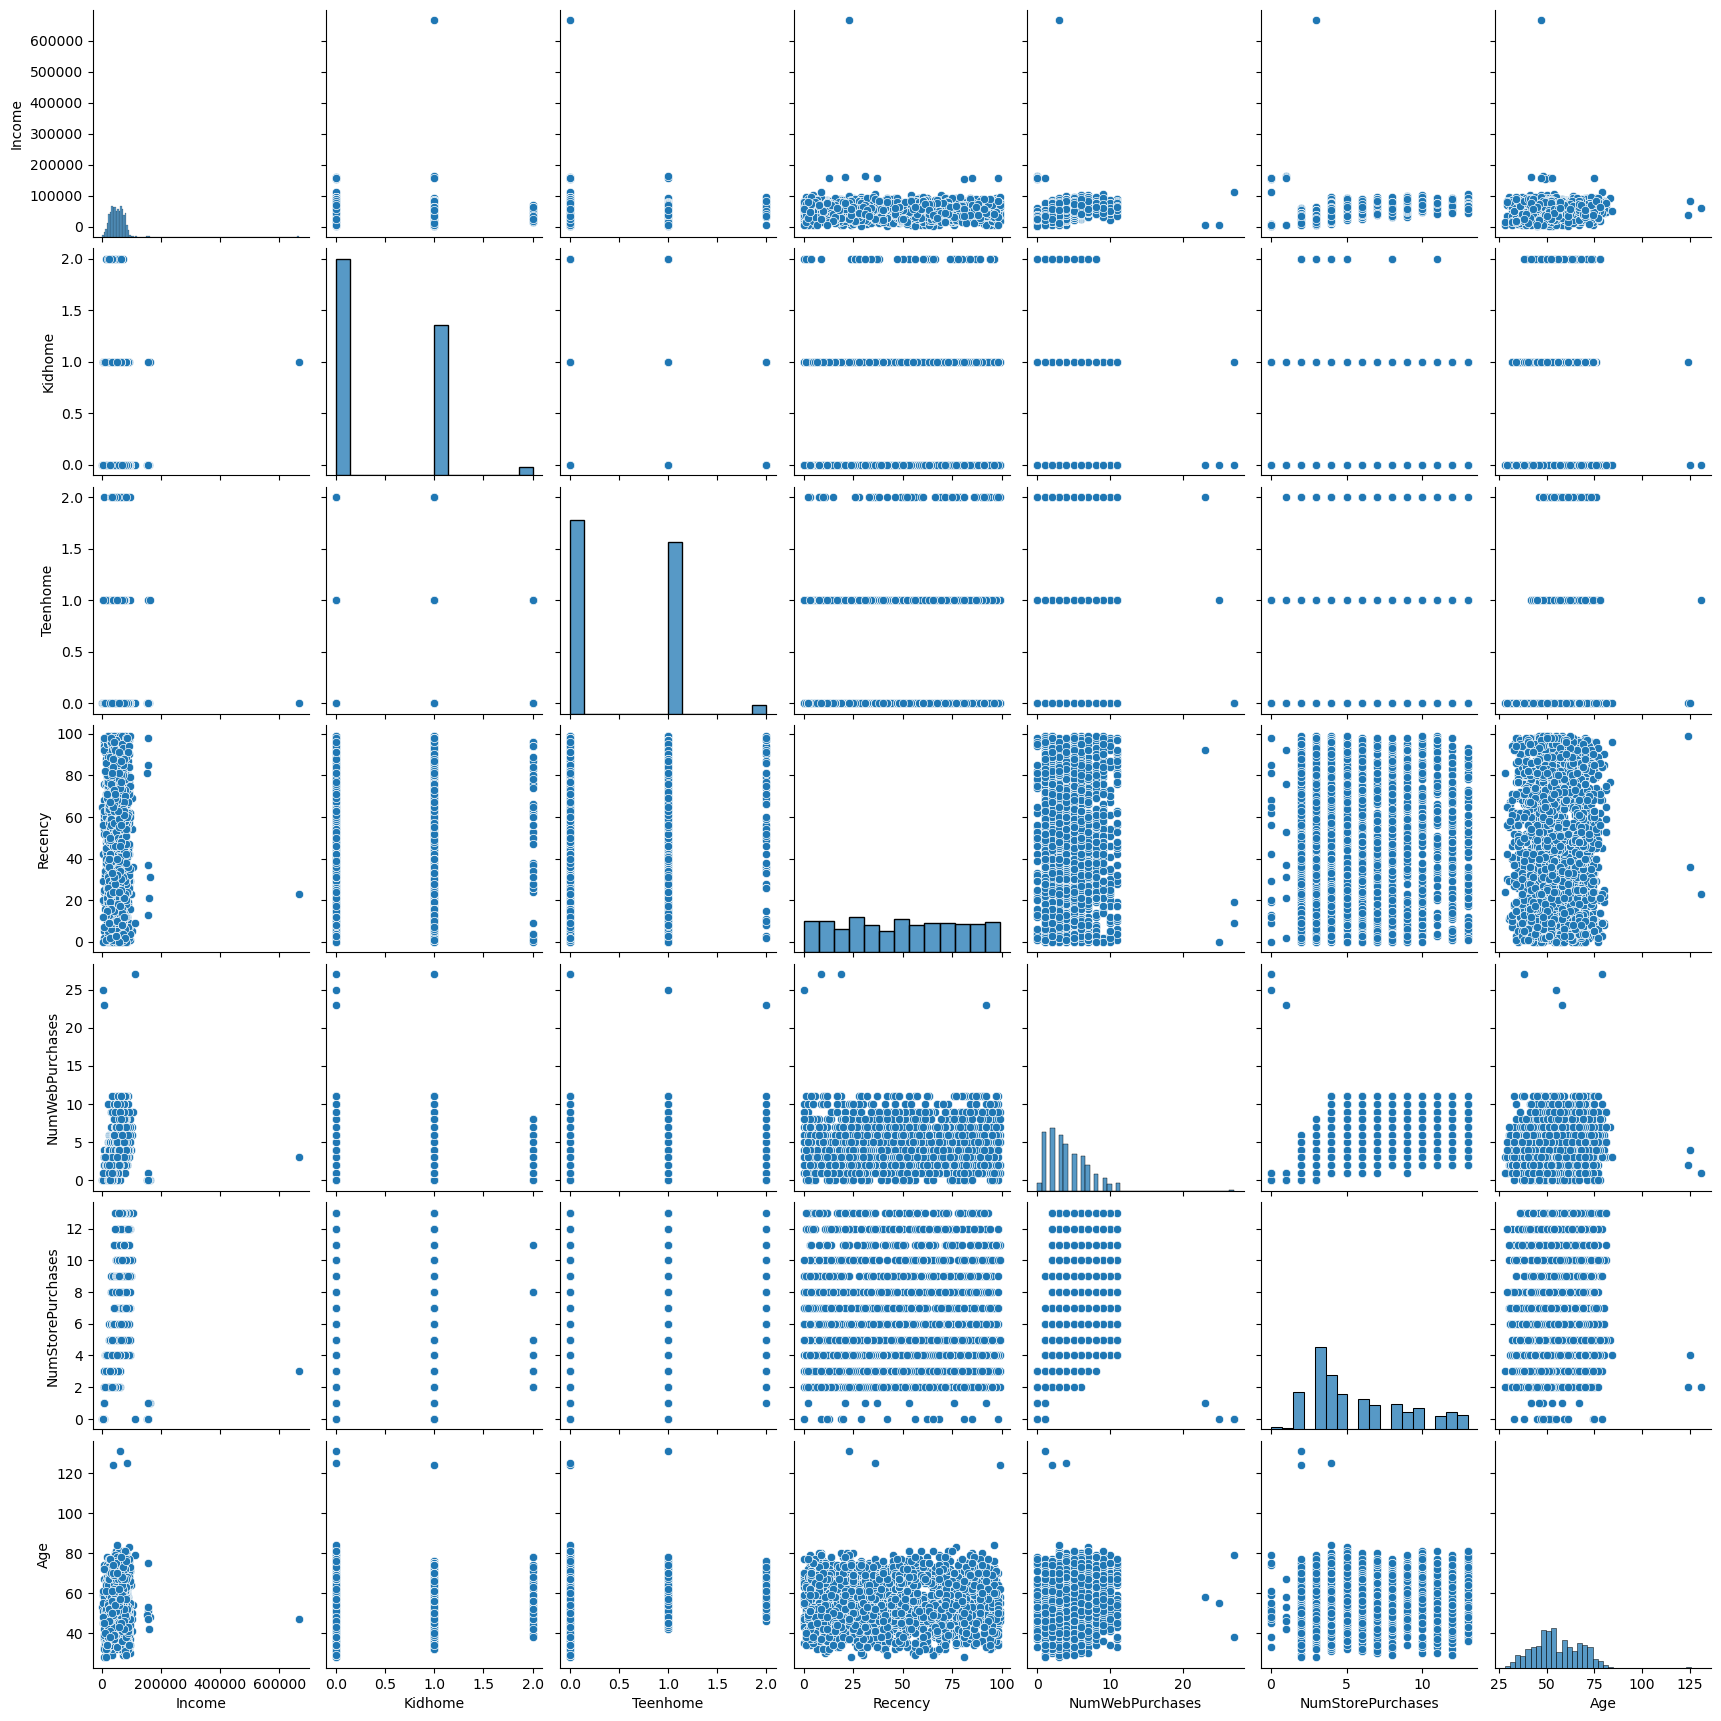

In [9]:
sns.pairplot(df[columns])

Сразу видно, что в данных есть выбросы по доходу (666'666$ (хотя мб и не выброс, но, наверное, удобнее считать, что выброс)) и по возрасту (131 год)

Замечения:
1) Люди с двумя детьми зарабатывают меньше
2) У людей с двумя детьми почти нет детей подростков, то есть, видимо, это молодые семьи

Остальные явные соответсвия я выделил выше